# Ex: 4.2: Visualizing Joined Datasets

- Objective: Concatenate and visualize two datasets to analyze the relationship between them by identifying the inventory levels for each product category on a monthly basis. The inventory for each month is calculated as the difference between the <b>cumulative sum of all orders</b> and the <b>cumulative sum of all sales</b> made up to and including that month.

- **Requires data files: `orders.csv` and `salesdata.csv`**

- **Demonstrates**:
    - Joining two DataFrames with different columns using pd.concat().
    - Cumulative sum (cumsum).
    - Create a line plot to visualize the inventory in each product category during each month.

---

### Step 1.

Execute the code cell below.  You'll see that two dataframes are created, one for sales during 2018, and one for orders during 2018.  After creating the two dataframes, examine the contents of each.

In [14]:
import pandas as pd

sales2018 = pd.read_csv('salesdata.csv', index_col='Month')
orders2018 = pd.read_csv('orders.csv', index_col='Month')

In [15]:
sales2018

,Pens,Pencils,Erasers,Paper
Month,,,,
Jan,400,550,80,480
Feb,370,420,55,450
Mar,255,302,25,280
Apr,150,225,20,200
May,200,275,41,225
Jun,125,170,25,184
Jul,50,80,10,100
Aug,425,600,90,505
Sep,423,580,95,525


In [16]:
orders2018

,Pens,Pencils,Erasers,Paper
Month,,,,
Jan,1200,1500,400,1400
Apr,500,500,100,600
Jul,1000,1400,400,1200
Oct,500,500,100,600


---

The ```sales2018``` dataframe records the sales in each product category during each month.  The ```orders2018``` dataframe records the purchasing of new inventory at the start of each quarter during 2018.  In other words, our company updates in-stock inventory every 3 months, by placing new orders with our suppliers, and then that inventory is depleted as we make sales.  We would like to combine these two datasets so that we can evaluate our in-stock inventory during any month throughout the year.

When we combine multiple datasets, we often need to decide how we want to "join" the data, given that they might have different sets of keys in an index.  The function ```pd.concat``` has an argument called ```join```, which can take one of two different values:

* ```join = 'inner'``` : keep only those keys that are in the intersection of the dataframe indexes
* ```join = 'outer'``` : keep only those keys that are in the union of the dataframe indexes

Since we want to keep all 12 months in our new dataset (instead of just the 4 that are shared), we want to do an "outer join", which is the default behavior for ```pd.concat```.

### Step 2.

In the code cell below, write an expression to concatenate the two dataframes column-wise and store the combined data in a new variable named ```sales_and_orders```:

* use the ```pd.concat``` function
* use the ```keys``` argument in the function to give the names <code>sales</code> and <code>orders</code> to the first level of the entries in the column MultiIndex
* use the ```sort=False``` argument to the function so that it preserves the order of the full sequences of months in the sales dataframe. 
* use the `axis=1` argument to specify that the concatenation should be column-wise

Once you're done, inspect the resulting dataframe.  The index should be the 12 months from Jan through Dec, and there should be 8 columns, representing the number of sales and orders in each of the 4 product categories.  Because orders are only placed in Jan, Apr, Jul and Oct, the orders data should be missing (NaN) for all other months.

In [17]:
sales_and_orders = pd.concat([sales2018, orders2018], axis=1, keys=['sales', 'orders'], sort=False)
sales_and_orders

sales                        orders                        
       Pens Pencils Erasers Paper    Pens Pencils Erasers   Paper
Month                                                            
Jan     400     550      80   480  1200.0  1500.0   400.0  1400.0
Feb     370     420      55   450     NaN     NaN     NaN     NaN
Mar     255     302      25   280     NaN     NaN     NaN     NaN
Apr     150     225      20   200   500.0   500.0   100.0   600.0
May     200     275      41   225     NaN     NaN     NaN     NaN
Jun     125     170      25   184     NaN     NaN     NaN     NaN
Jul      50      80      10   100  1000.0  1400.0   400.0  1200.0
Aug     425     600      90   505     NaN     NaN     NaN     NaN
Sep     423     580      95   525     NaN     NaN     NaN     NaN
Oct     200     225      60   400   500.0   500.0   100.0   600.0
Nov     105     106      12   203     NaN     NaN     NaN     NaN
Dec      78      69      15    99     NaN     NaN     NaN     NaN

### Step 3.

The ```sales_and_orders``` dataframe above should contain some missing data. The orders data for 8 of the 12 months are missing because those months were not part of the orders dataframe.  So when we did an "outer" join, pandas retained those keys but could not fill in any values for those cells.  

In addition, we know that the company updates it's in-stock inventory every 3 months. Therefore, we know that no orders were placed in each of the 8 months, and we can fill in the missing entries with 0.0 orders. 

In the code cell below, use the ```fillna``` method on the ```sales_and_orders``` dataframe to fill in the missing orders data with 0.0 orders.  In addition, pass in the argument ```inplace=True``` to modify the dataframe "in place". Inspect the dataframe to make sure that you have filled in the missing data correctly.

In [18]:
sales_and_orders.fillna(0.0, inplace=True)
sales_and_orders

sales                        orders                        
       Pens Pencils Erasers Paper    Pens Pencils Erasers   Paper
Month                                                            
Jan     400     550      80   480  1200.0  1500.0   400.0  1400.0
Feb     370     420      55   450     0.0     0.0     0.0     0.0
Mar     255     302      25   280     0.0     0.0     0.0     0.0
Apr     150     225      20   200   500.0   500.0   100.0   600.0
May     200     275      41   225     0.0     0.0     0.0     0.0
Jun     125     170      25   184     0.0     0.0     0.0     0.0
Jul      50      80      10   100  1000.0  1400.0   400.0  1200.0
Aug     425     600      90   505     0.0     0.0     0.0     0.0
Sep     423     580      95   525     0.0     0.0     0.0     0.0
Oct     200     225      60   400   500.0   500.0   100.0   600.0
Nov     105     106      12   203     0.0     0.0     0.0     0.0
Dec      78      69      15    99     0.0     0.0     0.0     0.0

Next, examine just the sales part of the dataframe. To do so, simply extract the subset of the dataframe with ```sales``` in the first level of the MultiIndex, as in the first code cell below.

Execute the two code cells below and inspect the printed output.

In [19]:
print(sales_and_orders['sales'])

       Pens  Pencils  Erasers  Paper
Month                               
Jan     400      550       80    480
Feb     370      420       55    450
Mar     255      302       25    280
Apr     150      225       20    200
May     200      275       41    225
Jun     125      170       25    184
Jul      50       80       10    100
Aug     425      600       90    505
Sep     423      580       95    525
Oct     200      225       60    400
Nov     105      106       12    203
Dec      78       69       15     99


In [20]:
print(sales_and_orders['orders'])

         Pens  Pencils  Erasers   Paper
Month                                  
Jan    1200.0   1500.0    400.0  1400.0
Feb       0.0      0.0      0.0     0.0
Mar       0.0      0.0      0.0     0.0
Apr     500.0    500.0    100.0   600.0
May       0.0      0.0      0.0     0.0
Jun       0.0      0.0      0.0     0.0
Jul    1000.0   1400.0    400.0  1200.0
Aug       0.0      0.0      0.0     0.0
Sep       0.0      0.0      0.0     0.0
Oct     500.0    500.0    100.0   600.0
Nov       0.0      0.0      0.0     0.0
Dec       0.0      0.0      0.0     0.0


### Step 4.

Our inventory in each product category during any month is equal to the difference between the sum of all orders that we have made up to that month and the sum of all sales that we have made up to that month.

A mathematical operation that captures this notion of "sum of everything up until this point" is called a *cumulative sum*.  Both numpy and pandas provide functions and/or methods to carry out cumulative sums; in both packages, this function is called ```cumsum```.  Consider the small example in the code cell below, which you should execute and then examine the printed output.

In [21]:
import numpy as np
alist = [1,2,3,4,5,6,7,8,9,10]
print(np.sum(alist))
print(np.cumsum(alist))

55
[ 1  3  6 10 15 21 28 36 45 55]


Where a ```sum``` operation simply computes the sum of all elements in a sequence and returns the total, a ```cumsum``` operation returns a sequence of cumulative sums, i.e., the sum of all elements up to a given position in the sequence.  By definition, the last entry in a sequence of cumulative sums is equal to the single value produced by just summing that sequence (55, in the case of the example above).

### Step 5.

Let's restate the objective once more: the inventory in each product category during any month is equal to the difference between the <b>sum of all orders</b> that we have made up to that month and the <b>sum of all sales</b> that we have made up to that month.

In the code cell below, write an expression to compute the monthly inventory based on the difference between the order and sales data, and assign the result to the variable ```inventory```.  Hint: You'll want to separately extract the `orders` and the `sales` portion of the `sales_and_orders` dataframe, and use the ```cumsum``` method on each resulting dataframe to get the cumulative totals at each month. Finally, find the difference between the two.

In [26]:
inventory = np.cumsum(sales_and_orders['orders']) - np.cumsum(sales_and_orders['sales'])
inventory

,Pens,Pencils,Erasers,Paper
Month,,,,
Jan,800.0,950.0,320.0,920.0
Feb,430.0,530.0,265.0,470.0
Mar,175.0,228.0,240.0,190.0
Apr,525.0,503.0,320.0,590.0
May,325.0,228.0,279.0,365.0
Jun,200.0,58.0,254.0,181.0
Jul,1150.0,1378.0,644.0,1281.0
Aug,725.0,778.0,554.0,776.0
Sep,302.0,198.0,459.0,251.0


### Step 6.

Use the `sns.lineplot() function` to generate the line plot. The `data argument` should reference your `inventory DataFrame`


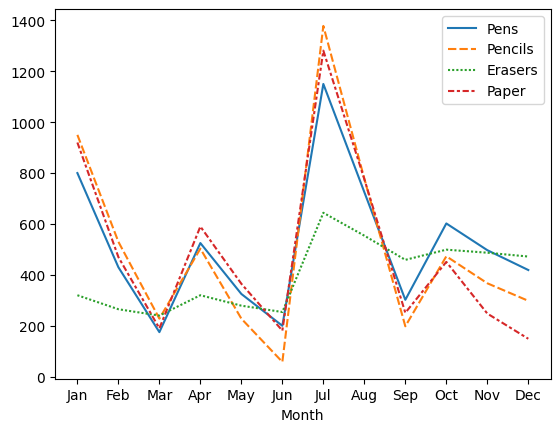

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=inventory)
plt.show()